In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

class ProcessData():
    
    def __init__(self, csv_file):
        df = pd.read_csv(csv_file,sep=',')
        df.replace('-',None,inplace=True)
        df = df.astype(float)
        df = df.dropna()
        self.t = df.values[:,:-2].astype('float32')
        self.y = df.values[:,1:].astype('float32')
        self.y = self.y.reshape((len(self.y),2))
        return 
        
    def __len__(self):
        return len(self.t)

    def __getitem__(self, idx):
        return([self.t[idx],self.y[idx]])
    
def Interpolation_model(n=2):
    """
    Model to interpolate the data.
    Parameter n indicates how many data series will be processed.
    """
    model = tf.keras.Sequential([
        layers.LSTM(40,input_shape=(None,1),return_sequences=True),
        layers.LSTM(40),
        layers.Dense(n)
    ])

    model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

    return(model)

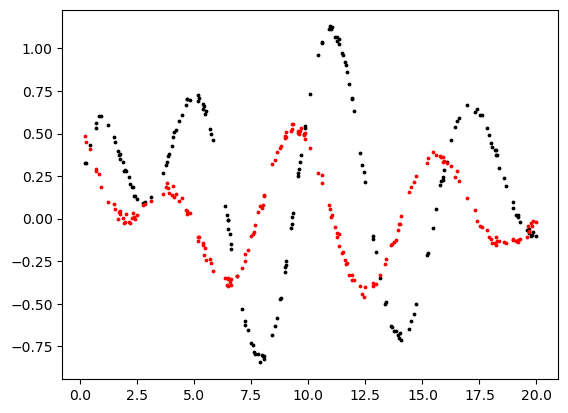

In [3]:
X = ProcessData('dat.csv')
plt.scatter(X.t,X.y[:,0],s=3,c='k')
plt.scatter(X.t,X.y[:,1],s=3,c='r')

In [4]:
model = Interpolation_model()
history = model.fit(X.t,X.y,epochs=600,verbose=0,batch_size=10)
history_dict = history.history
print(history_dict['loss'][-1])

0.0006301067187450826


6/6 [==============================] - 0s 1ms/step


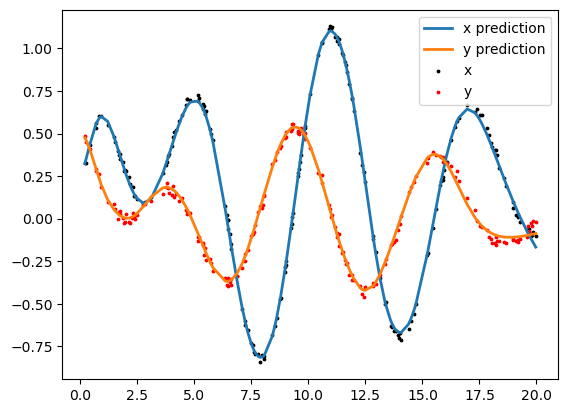

In [6]:
pre = model.predict(X.t)
plt.plot(X.t,pre[:,0],linewidth=2)
plt.plot(X.t,pre[:,1],linewidth=2)
plt.scatter(X.t,X.y[:,0],s=3,c='k')
plt.scatter(X.t,X.y[:,1],s=3,c='r')
plt.legend(['x prediction','y prediction','x','y'])